<a href="https://colab.research.google.com/github/limeng1011/kaggletitanic_022323/blob/main/TitanicDataset_022023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
titanic_df = pd.read_csv('train.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pclass_df = pd.get_dummies(data=titanic_df['Pclass'], prefix='Pclass', prefix_sep='_')

In [ ]:
titanic_df[['Pclass_1','Pclass_2']] = pclass_df[['Pclass_1','Pclass_2']]

In [ ]:
new_df = titanic_df.drop(['PassengerId','Pclass'], axis=1)

In [ ]:
new_df = new_df.drop('Name', axis=1)

In [ ]:
new_df.head()

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2
0,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
def sex_num(sex):
  if sex == 'female':
    return 0
  elif sex == 'male':
    return 1

new_df['Sex'] = new_df['Sex'].apply(sex_num)

In [ ]:
new_df.head()

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2
0,0,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,0,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,1,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
def has_company(sibsp):
  if sibsp == 0:
    return 0
  else:
    return 1

new_df['HasCompany'] = new_df['SibSp'].apply(has_company)

In [ ]:
def has_parch(parch):
  if parch == 0:
    return 0
  else:
    return 1

new_df['HasParch'] = new_df['Parch'].apply(has_parch)

In [ ]:
new_df = new_df.drop(['SibSp', 'Parch', 'Ticket'], axis=1)

In [ ]:
new_df.head()

,Survived,Sex,Age,Fare,Cabin,Embarked,Pclass_1,Pclass_2,HasCompany,HasParch
0,0,1,22.0,7.2500,NaN,S,0,0,1,0
1,1,0,38.0,71.2833,C85,C,1,0,1,0
2,1,0,26.0,7.9250,NaN,S,0,0,0,0
3,1,0,35.0,53.1000,C123,S,1,0,1,0
4,0,1,35.0,8.0500,NaN,S,0,0,0,0


In [ ]:
embarked_df = pd.get_dummies(new_df['Embarked'], prefix='Embarked', prefix_sep='_')

In [ ]:
new_df[['Embarked_C', 'Embarked_Q']] = embarked_df[['Embarked_C', 'Embarked_Q']]

In [ ]:
new_df = new_df.drop(['Cabin','Embarked'], axis=1)

In [ ]:
new_df['Age'].mean()

29.69911764705882

In [ ]:
new_df = new_df.fillna(value=29.7)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    uint8  
 5   Pclass_2    891 non-null    uint8  
 6   HasCompany  891 non-null    int64  
 7   HasParch    891 non-null    int64  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [ ]:
target = new_df['Survived']
features = new_df.drop('Survived', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

In [ ]:
logreg.score(X_train, y_train)

0.7907303370786517

In [ ]:
logreg.score(X_test, y_test)

0.8379888268156425

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

In [ ]:
rfc.score(X_train, y_train)

0.9845505617977528

In [ ]:
rfc.score(X_test, y_test)

0.8268156424581006

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [ ]:
knc.score(X_train, y_train)

0.7949438202247191

In [ ]:
knc.score(X_test, y_test)

0.7094972067039106

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
gnb.score(X_train, y_train)

0.7570224719101124

In [ ]:
gnb.score(X_test, y_test)

0.7821229050279329

In [ ]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

In [ ]:
svc.score(X_train, y_train)

0.6629213483146067

In [ ]:
svc.score(X_test, y_test)

0.6759776536312849

In [ ]:
# 3 columns need to deal with NaN values issue
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# No duplicated row, good
titanic_df[titanic_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# 'Survived' is going to be the target and there is no NaN, good.
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# No missing values in 'Pclass', good, and it is categorical variable, so we will need dummy variables
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# No missing values for 'Sex', good, we will assign 0 and 1 later
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

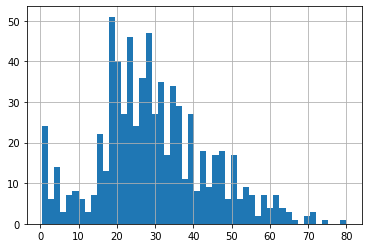

In [ ]:
# Age is a continuous variable
titanic_df['Age'].hist(bins=50)

In [ ]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Will need to deal with the missing values for 'Age'
titanic_df['Age'].isna().sum()

177

In [ ]:
# Maybe we need to convert this column
titanic_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
#
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
# ticket number is not useful?

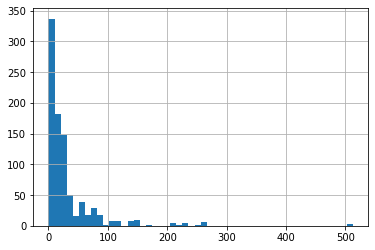

In [ ]:
# Fare
titanic_df['Fare'].hist(bins=50)

In [ ]:
# Too many missing values for cabin, maybe we drop this one?

In [ ]:
# We will drop the two missing values and use dummy variables
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


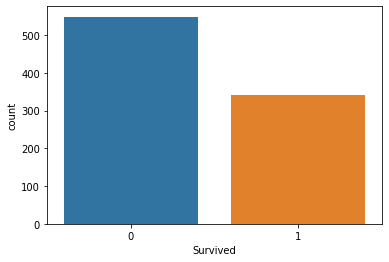

In [ ]:
sns.countplot(data=titanic_df, x='Survived')

In [ ]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

891